# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [7]:
import numpy as np

### Simulation du lancé de dé

In [8]:
def Roll():
    return int(np.random.choice(range(1,7),1)) //la fonction roll nou donne une valeur aleatoire entre 1 et 6

In [9]:
Roll()

6

### Compléter le code et commenter

In [10]:
def sim(k):
    A=0           //initialiser la position dans le sible
    temp=Roll()   //premiere simulation pour voir si on avoir 6 ou non pour sortir et commencer a deplacer dans le sible
    NA=0          //initialiser le nombre des essai a 0
    while temp<6:     //cette boucle se repete jusqua ce que temp =!6
        NA=NA+1
        temp=Roll()
    A=1               //on obtient 6 donc on increme,te la position a 1
    while A!=k:                                //cette boucle se repete jusqua ce que A devient egale au nombre k initialiser
        temp=Roll()
        NA=NA+1
        #print("nb essai =",NA,"position ",A)
        if(A+temp<=k):                   
        
            A=A+temp
        elif temp+A > k : //si temp+A>k on va sortir du valeur k maximale donc on ne fait rien ,juste on incremente le nombre des essai
            NA+=1
        else :
            A=k
            NA+=1
    #print("nb essai =",NA,"position ",A)
    return NA


    

### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [11]:

l=[sim(40) for i in range(2000)]
f=sum(l)/2000

### Simulation de $10^5$  scénario 

In [12]:
x=list(range(10,20))

In [13]:
y=[np.fromiter((sim(u) for i in range(10**4)),dtype=int).sum()/50000 for u in x]

In [14]:
import matplotlib.pyplot as plt

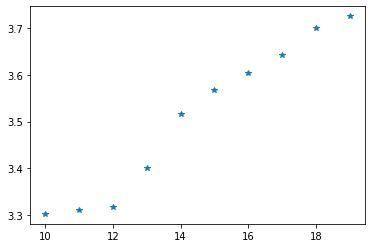

In [15]:
plt.plot(x,y,"*")

In [16]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [17]:
slope

0.053697696969696986

In [18]:
intercept


2.729883393939394

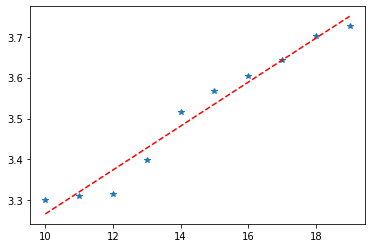

In [19]:
yy=[slope*u+intercept for u in x]
plt.plot(x,y,'*',x,yy,'r--')

In [ ]:
//on obtient une droite affine desquation   ax+b telque b est intercept  et a est slope